In [40]:
import pandas as pd
import numpy as np

In [41]:
#我存在默认目录，所以没有写路径
data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv',header=0)

In [42]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [44]:
def num_missing(x):
    return sum(x.isnull())

In [45]:
print(data.apply(num_missing,axis=0))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [46]:
data['Loan_Status'].describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

In [47]:
data.drop('Loan_ID',1,inplace=True)

In [48]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
#变量的空值删除处理
data.dropna(axis=0,how='all',inplace=True)

In [50]:
data.dropna(axis=1,how='all',inplace=True)

In [51]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [52]:
pd.unique(data['Property_Area'].values)

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [53]:
pd.unique(data['Married'].values)

array(['No', 'Yes', nan], dtype=object)

In [54]:
for col in data.select_dtypes(include=['object']).columns:
    print("Column {} has {} unique instances".format(col,len(data[col].unique())))

Column Gender has 3 unique instances
Column Married has 3 unique instances
Column Dependents has 5 unique instances
Column Education has 2 unique instances
Column Self_Employed has 3 unique instances
Column Property_Area has 3 unique instances
Column Loan_Status has 2 unique instances


变量：
1、连续的数值
2、离散的分类变量

In [55]:
print(data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [56]:
data.select_dtypes(include=['object']).describe().T.\
assign(missing_pct=data.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,unique,top,freq,missing_pct
Gender,601,2,Male,489,0.021173
Married,611,2,Yes,398,0.004886
Dependents,599,4,0,345,0.024430
Education,614,2,Graduate,480,0.000000
Self_Employed,582,2,No,500,0.052117
Property_Area,614,3,Semiurban,233,0.000000
Loan_Status,614,2,Y,422,0.000000


In [57]:
data.select_dtypes(include=['float']).describe().T.\
assign(missing_pct=data.apply(lambda x : (len(x)-x.count())/float(len(x))))

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max,missing_pct
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0,0.000000
LoanAmount,592.0,146.412162,85.587325,9.0,NaN,NaN,NaN,700.0,0.035831
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,NaN,NaN,NaN,480.0,0.022801
Credit_History,564.0,0.842199,0.364878,0.0,NaN,NaN,NaN,1.0,0.081433


In [58]:
#变量的排序
data_sort=data.sort_values(['ApplicantIncome','CoapplicantIncome'],ascending=False)
data_sort[['ApplicantIncome','CoapplicantIncome']].head(7)

,ApplicantIncome,CoapplicantIncome
409,81000,0.0
333,63337,0.0
171,51763,0.0
155,39999,0.0
185,39147,4750.0
443,37719,0.0
183,33846,0.0


In [59]:
#crosstab
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [60]:
def perc(x):
    return x/float(x[-1])
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True).apply(perc,axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [61]:
from matplotlib import pyplot as plt
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000003AD2E5CBE0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000003AD2EBAE80>], dtype=object)

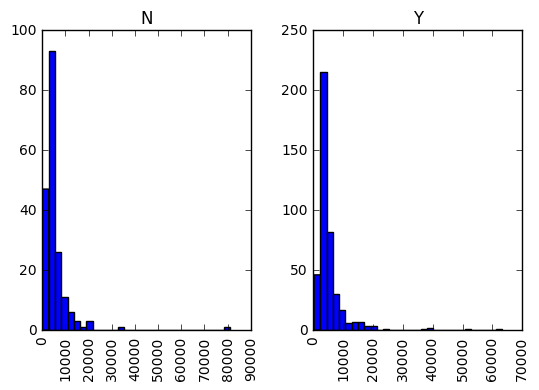

In [62]:
data.hist(column='ApplicantIncome',by='Loan_Status',bins=30)

In [63]:
#变量的相关性
datacoor=data.corr()

NameError: name '变量的相关性' is not defined

In [33]:
datacoor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [64]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
Y=data.Loan_Status

In [66]:
X=data.drop('Loan_Status',1,inplace=True)

In [68]:
print(Y.shape)

(614,)
